# EDA of brfss_2015_transformed

In [6]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import sys
from pathlib import Path

# Ensure the script can find the config.py file in the project root
sys.path.insert(
    0,
    next(
        (
            str(p)
            for p in [Path.cwd(), *Path.cwd().parents]
            if (p / "config.py").exists()
        ),
        "",
    ),
)

from src.config import DATA_SPLIT_DIR, TRAIN_RAW_FILENAME

In [8]:
df_raw = pd.read_csv(
    os.path.join(DATA_SPLIT_DIR, TRAIN_RAW_FILENAME),
    usecols=[
        "Diabetes_012",
        "HighBP",
        "HighChol",
        "CholCheck",
        "BMI",
        "Smoker",
        "Stroke",
        "HeartDiseaseorAttack",
        "PhysActivity",
        "Fruits",
        "Veggies",
        "HvyAlcoholConsump",
        "AnyHealthcare",
        "NoDocbcCost",
        "GenHlth",
        "MentHlth",
        "PhysHlth",
        "DiffWalk",
        "Sex",
        "Age",
        "Education",
        "Income",
    ],
)

## First glance at raw data

In [9]:
display(df_raw.shape)

(374559, 22)

In [10]:
display(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374559 entries, 0 to 374558
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          374559 non-null  object 
 1   HighBP                373489 non-null  object 
 2   HighChol              321453 non-null  object 
 3   CholCheck             361678 non-null  object 
 4   BMI                   343810 non-null  float64
 5   Smoker                359736 non-null  object 
 6   Stroke                373586 non-null  object 
 7   HeartDiseaseorAttack  371382 non-null  object 
 8   PhysActivity          342315 non-null  object 
 9   Fruits                337525 non-null  object 
 10  Veggies               331236 non-null  object 
 11  HvyAlcoholConsump     352777 non-null  object 
 12  AnyHealthcare         373046 non-null  object 
 13  NoDocbcCost           373570 non-null  object 
 14  GenHlth               373517 non-null  object 
 15  

None

In [11]:
df_raw.isna().sum()

Diabetes_012                0
HighBP                   1070
HighChol                53106
CholCheck               12881
BMI                     30749
Smoker                  14823
Stroke                    973
HeartDiseaseorAttack     3177
PhysActivity            32244
Fruits                  37034
Veggies                 43323
HvyAlcoholConsump       21782
AnyHealthcare            1513
NoDocbcCost               989
GenHlth                  1042
MentHlth                 6237
PhysHlth                 8242
DiffWalk                12287
Sex                         0
Age                      4455
Education                1491
Income                  67203
dtype: int64

#### Observation
* There are missing values in every columns except `Sex`.
* Only three columns contain numbers.

In [12]:
df_raw.head().T

,0,1,2,3,4
Diabetes_012,no dia,no dia,no dia,no dia,dia
HighBP,n,n,n,y,y
HighChol,n,n,n,n,y
CholCheck,y,y,y,y,y
BMI,25.61,31.09,NaN,24.18,NaN
Smoker,y,NaN,NaN,y,n
Stroke,n,n,n,n,n
HeartDiseaseorAttack,n,n,n,n,n
PhysActivity,y,y,y,y,y
Fruits,y,n,y,n,y


In [13]:
display(df_raw[df_raw.select_dtypes(include="number").columns].describe())

,BMI,MentHlth,PhysHlth
count,343810.000000,368322.000000,366317.000000
mean,28.045012,3.318371,4.295992
std,6.656081,7.613406,8.811782
min,12.020000,0.000000,0.000000
25%,23.730000,0.000000,0.000000
50%,26.950000,0.000000,0.000000
75%,30.900000,2.000000,3.000000
max,99.950000,30.000000,30.000000


#### Observation
* `BMI` has a very high maximum. Possibly an outlier.
* Most features are severely skewed.

## Converted to intended datatype

### Data Dictionary – Diabetes Health Indicators

| Column                | Datatype   | Description                                                                 |
|-----------------------|------------|-----------------------------------------------------------------------------|
| `Diabetes_012`        | nominal    | 0 = no diabetes, 1 = prediabetes, 2 = diabetes                              |
| `HighBP`              | nominal    | 0 = no high blood pressure, 1 = high blood pressure                         |
| `HighChol`            | nominal    | 0 = no high cholesterol, 1 = high cholesterol                               |
| `CholCheck`           | nominal    | 0 = no cholesterol check in 5 years, 1 = yes                                |
| `BMI`                 | float      | Body Mass Index                                                             |
| `Smoker`              | nominal    | Smoked ≥100 cigarettes in lifetime: 0 = no, 1 = yes                         |
| `Stroke`              | nominal    | Ever told had a stroke: 0 = no, 1 = yes                                     |
| `HeartDiseaseorAttack`| nominal    | CHD or MI history: 0 = no, 1 = yes                                          |
| `PhysActivity`        | nominal    | Physical activity (last 30 days, non-job): 0 = no, 1 = yes                  |
| `Fruits`              | nominal    | Consumes fruit ≥1×/day: 0 = no, 1 = yes                                     |
| `Veggies`             | nominal    | Consumes vegetables ≥1×/day: 0 = no, 1 = yes                                |
| `HvyAlcoholConsump`   | nominal    | Heavy drinker: 0 = no, 1 = yes                                              |
| `AnyHealthcare`       | nominal    | Has health coverage: 0 = no, 1 = yes                                        |
| `NoDocbcCost`         | nominal    | Missed doctor due to cost (last 12 months): 0 = no, 1 = yes                 |
| `GenHlth`             | ordinal    | General health: 1 = excellent, ..., 5 = poor                                |
| `MentHlth`            | int        | Days of poor mental health (last 30 days), 0–30                             |
| `PhysHlth`            | int        | Days of poor physical health (last 30 days), 0–30                           |
| `DiffWalk`            | nominal    | Serious difficulty walking/stairs: 0 = no, 1 = yes                          |
| `Sex`                 | nominal    | 0 = female, 1 = male                                                        |
| `Age`                 | ordinal    | Age category: 1 = 18–24, ..., 13 = 80+                                      |
| `Education`           | ordinal    | Education level: 1 = none to kindergarten, ..., 6 = college grad           |
| `Income`              | ordinal    | Income level: 1 = < $10k, ..., 8 = ≥ $75k                                   |



In [14]:
inverse_dict = {
    "Diabetes_012": {"no dia": 0, "pre": 1, "dia": 2},
    "HighBP": {"n": 0, "y": 1},
    "HighChol": {"n": 0, "y": 1},
    "CholCheck": {"n": 0, "y": 1},
    "Smoker": {"n": 0, "y": 1},
    "Stroke": {"n": 0, "y": 1},
    "HeartDiseaseorAttack": {"n": 0, "y": 1},
    "PhysActivity": {"n": 0, "y": 1},
    "Fruits": {"n": 0, "y": 1},
    "Veggies": {"n": 0, "y": 1},
    "HvyAlcoholConsump": {"n": 0, "y": 1},
    "AnyHealthcare": {"n": 0, "y": 1},
    "NoDocbcCost": {"n": 0, "y": 1},
    "GenHlth": {"excellent": 1, "very good": 2, "good": 3, "fair": 4, "poor": 5},
    "DiffWalk": {"n": 0, "y": 1},
    "Sex": {"f": 0, "m": 1},
    "Age": {
        "18-24": 1,
        "25-29": 2,
        "30-34": 3,
        "35-39": 4,
        "40-44": 5,
        "45-49": 6,
        "50-54": 7,
        "55-59": 8,
        "60-64": 9,
        "65-69": 10,
        "70-74": 11,
        "75-79": 12,
        "80+": 13,
    },
    "Education": {
        "no school": 1,
        "elementary": 2,
        "some high school": 3,
        "high school graduate": 4,
        "college": 5,
        "college graduate": 6,
    },
    "Income": {
        "<$10k": 1,
        "<$15k": 2,
        "<$20k": 3,
        "<$25k": 4,
        "<$35k": 5,
        "<$50k": 6,
        "<$75k": 7,
        ">$75k": 8,
    },
}

### Conversion

In [15]:
nom_cat_cols = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex",
]


df_raw[nom_cat_cols] = df_raw[nom_cat_cols].astype("category")

ord_cat_cols = ["GenHlth", "Age", "Education", "Income", "Diabetes_012"]

for col in ord_cat_cols:
    df_raw[col] = pd.Categorical(df_raw[col], categories=inverse_dict[col].keys(), ordered=True)


## Info, Describe, Overview

In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374559 entries, 0 to 374558
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_012          374559 non-null  category
 1   HighBP                373489 non-null  category
 2   HighChol              321453 non-null  category
 3   CholCheck             361678 non-null  category
 4   BMI                   343810 non-null  float64 
 5   Smoker                359736 non-null  category
 6   Stroke                373586 non-null  category
 7   HeartDiseaseorAttack  371382 non-null  category
 8   PhysActivity          342315 non-null  category
 9   Fruits                337525 non-null  category
 10  Veggies               331236 non-null  category
 11  HvyAlcoholConsump     352777 non-null  category
 12  AnyHealthcare         373046 non-null  category
 13  NoDocbcCost           373570 non-null  category
 14  GenHlth               373517 non-nul

In [17]:
display(df_raw.loc[:, df_raw.select_dtypes(include="number").columns].describe())

,BMI,MentHlth,PhysHlth
count,343810.000000,368322.000000,366317.000000
mean,28.045012,3.318371,4.295992
std,6.656081,7.613406,8.811782
min,12.020000,0.000000,0.000000
25%,23.730000,0.000000,0.000000
50%,26.950000,0.000000,0.000000
75%,30.900000,2.000000,3.000000
max,99.950000,30.000000,30.000000


In [18]:
def overview(df):
    """
    Creates and prints an overview of the DataFrame including data types, counts, missing values,
    unique values, and some basic statistics.
    """
    from pandas.api.types import is_numeric_dtype

    def normalized_entropy_cat(series: pd.Series) -> float:
        """
        Compute the normalized Shannon entropy of a categorical distribution.

        | Entropy in [0,1]| Interpretation         | Example class distribution   |
        | --------------- | ---------------------- | ---------------------------- |
        | 0.00 - 0.20     | Extremely imbalanced   | e.g. 99% / 1%                |
        | 0.20 - 0.40     | Strongly imbalanced    | e.g. 90% / 10% or 80/10/10   |
        | 0.40 - 0.60     | Moderately imbalanced  | e.g. 70/30 or 60/20/20       |
        | 0.60 - 0.80     | Slightly imbalanced    | e.g. 50/25/25                |
        | 0.80 - 1.00     | Balanced               | e.g. 33/33/33 or 25/25/25/25 |


        Returns 0 if only one class is present, 1 for perfectly uniform distribution.
        """
        counts = series.value_counts(normalize=True)
        entropy = -np.sum(counts * np.log2(counts))
        max_entropy = np.log2(len(counts)) if len(counts) > 1 else 1
        return entropy / max_entropy

    display(
        pd.DataFrame(
            {
                "dtype": df.dtypes,
                "total": df.count(),
                "missing": df.isna().sum(),
                "missing%": df.isna().mean() * 100,
                "n_uniques": df.nunique(),
                "uniques%": df.nunique() / df.shape[0] * 100,
                "uniques": [sorted((str(x) for x in df[col].unique())) for col in df.columns],
                "non-numeric": [
                    list(
                        df[col][pd.to_numeric(df[col], errors="coerce").isna()].unique()
                    )
                    for col in df.columns
                ],
                "dev from mean": [
                    (
                        (
                            round(
                                ((df[col].mean() - df[col].min()) / df[col].std()), 1
                            ),
                            round(
                                ((df[col].max() - df[col].mean()) / df[col].std()), 1
                            ),
                        )
                        if is_numeric_dtype(df[col])
                        else pd.NA
                    )
                    for col in df.columns
                ],
                "most/least freq": [
                    (
                        (
                            {
                                df[col].value_counts().index[i]: list(
                                    df[col].value_counts()
                                )[i]
                                for i in (0, -1)
                            }
                        )
                        if not is_numeric_dtype(df[col])
                        else pd.NA
                    )
                    for col in df.columns
                ],
                "norm entropy": [
                    round(normalized_entropy_cat(df[col]), 2)
                    if isinstance(df[col].dtype, pd.CategoricalDtype)
                    else pd.NA
                    for col in df.columns
                ],
            }
        )
    )


overview(df_raw)

,dtype,total,missing,missing%,n_uniques,uniques%,uniques,non-numeric,dev from mean,most/least freq,norm entropy
Diabetes_012,category,374559,0,0.000000,3,0.000801,"[dia, no dia, pre]","[no dia, dia, pre]",<NA>,"{'no dia': 319337, 'dia': 6510}",0.43
HighBP,category,373489,1070,0.285669,2,0.000534,"[n, nan, y]","[n, y, nan]",<NA>,"{'n': 222388, 'y': 151101}",0.97
HighChol,category,321453,53106,14.178274,2,0.000534,"[n, nan, y]","[n, y, nan]",<NA>,"{'n': 185657, 'y': 135796}",0.98
CholCheck,category,361678,12881,3.438978,2,0.000534,"[n, nan, y]","[y, n, nan]",<NA>,"{'y': 308072, 'n': 53606}",0.61
BMI,float64,343810,30749,8.209388,3610,0.963800,"[12.02, 12.05, 12.15, 12.16, 12.17, 12.21, 12....",[nan],"(2.4, 10.8)",<NA>,<NA>
Smoker,category,359736,14823,3.957454,2,0.000534,"[n, nan, y]","[y, nan, n]",<NA>,"{'n': 203286, 'y': 156450}",0.99
Stroke,category,373586,973,0.259772,2,0.000534,"[n, nan, y]","[n, y, nan]",<NA>,"{'n': 358037, 'y': 15549}",0.25
HeartDiseaseorAttack,category,371382,3177,0.848197,2,0.000534,"[n, nan, y]","[n, y, nan]",<NA>,"{'n': 338635, 'y': 32747}",0.43
PhysActivity,category,342315,32244,8.608524,2,0.000534,"[n, nan, y]","[y, n, nan]",<NA>,"{'y': 251347, 'n': 90968}",0.84
Fruits,category,337525,37034,9.887361,2,0.000534,"[n, nan, y]","[y, n, nan]",<NA>,"{'y': 210273, 'n': 127252}",0.96


#### Observation
* `Age`, `Education`, `Income`, `Diabetes_012` are categories with more than two values. All other categories are logical.
* The target `Diabetes_012` is imbalanced.
* `BMI` contains values further than 10 standard deviations from the mean. Check for outliers.
* `Stroke`, `HvyAlcoholConsump`,  `HvyAlcoholConsump` are strongly unbalanced.
* `HeartDiseaseorAttack`, `NoDocbcCost` are moderately unbalanced.

## Crosstabs

#### Observation
* The ratio of persons with diabetes do not differ by more than two percentage points in nominal features. Most are less than that.
* Persons with `HighBP`, `HighChol`, `Stroke`, `HeartDiseaseOrAttack` have an at least five percentage points higher ratio of prediabetes.
* Persons with `PhysActivity`, `HvyAlcoholConsump`, `DiffWalk` have an at least five percentage points lower ratio of prediabetes.
* Ordinal categories suggest a correlation between increasing values and state of health.

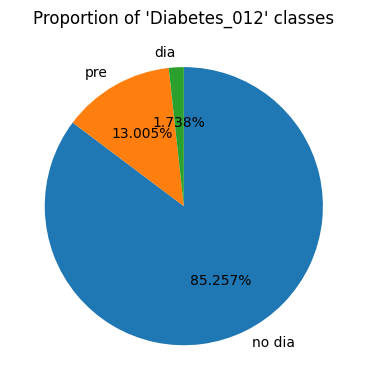

CPU times: total: 391 ms
Wall time: 628 ms


In [21]:
%%time
import matplotlib.pyplot as plt

counts = df_raw["Diabetes_012"].value_counts(normalize=True).sort_index()

plt.figure(figsize=(4, 4))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct=lambda p: f"{p:.3f}%",
    startangle=90,
    counterclock=False,
)
plt.title("Proportion of 'Diabetes_012' classes")
plt.tight_layout()
plt.show()

In [21]:
def catplot(df, x, y):
    """Display a barplot of a normalized crosstab between x and y and an absolute crosstab for a sanity check.
    ARGS:
        x: Crosstab 'index' column
        y: Crosstab 'columns' column (default: eda['Infected'])
    RETURNS: None
    """

    ncols = 2
    fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(16, 2))

    crosstab_abs = pd.crosstab(index=df[x], columns=df[y])
    crosstab_rel = pd.crosstab(index=df[x], columns=df[y], normalize="index")

    # Plot them side by side
    crosstab_abs.plot(
        kind="bar",
        ax=ax[0],
        title=f"Absolute Distribution of diabetes in {x}",
        legend=False,
    )
    crosstab_rel.plot(
        kind="bar",
        ax=ax[1],
        title=f"Relative Distribution of diabetes in {x}",
        legend=False,
    )
    ax[1].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    for p in ax[1].patches:
        height = p.get_height()
        if not pd.isna(height) and height > 0:
            ax[1].annotate(
                f"{height:.2f}",
                (p.get_x() + p.get_width() / 2, height),
                ha="center",
                va="bottom",
                fontsize=8,
            )

    for i in range(ncols):
        ax[i].set_xlabel(x)
        ax[i].set_ylabel("Count")
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=0)
        ax[i].grid(axis="y", linestyle="--", alpha=0.7)
        
    plt.tight_layout()
    plt.show()

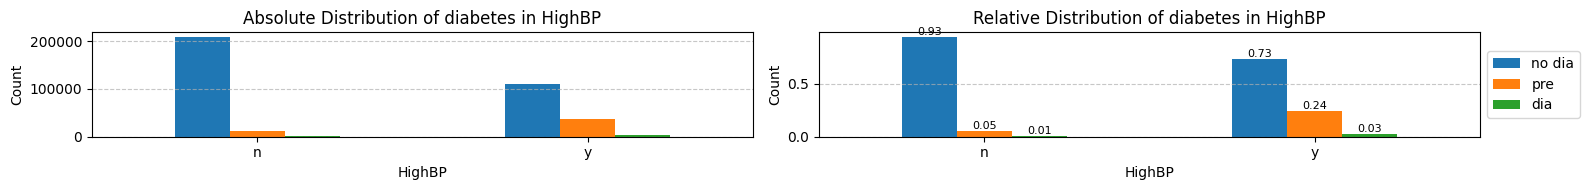

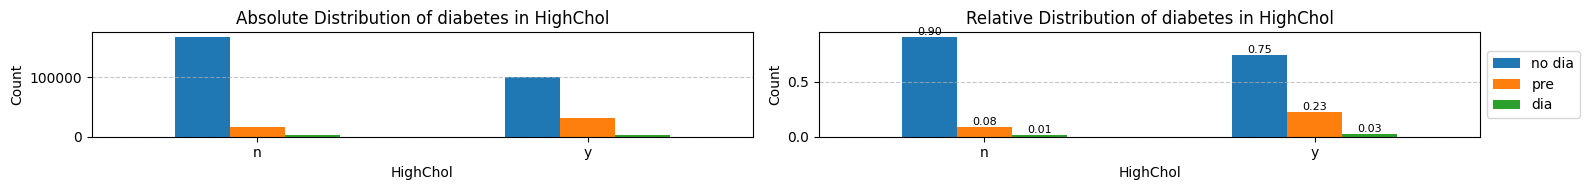

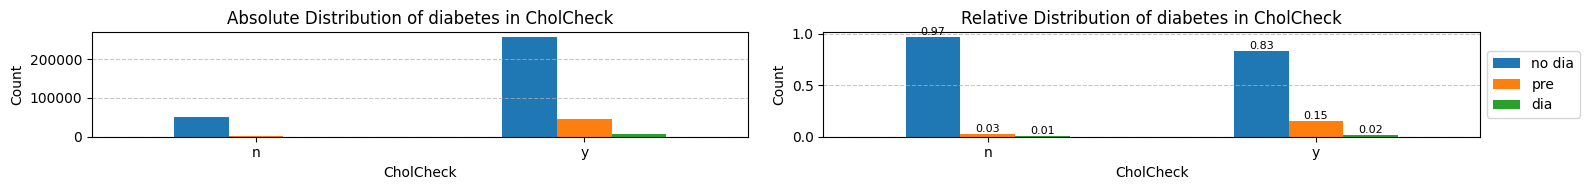

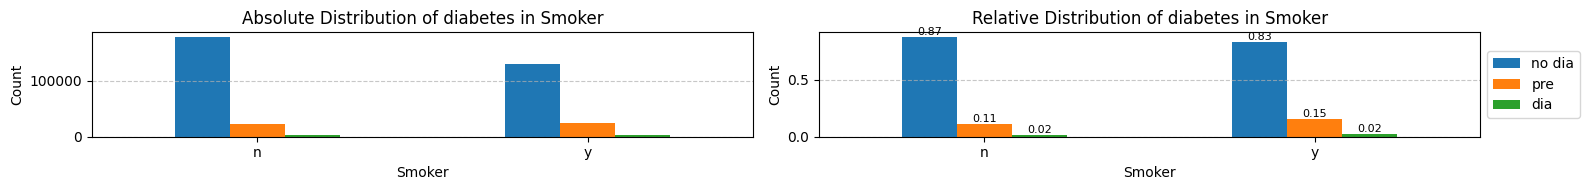

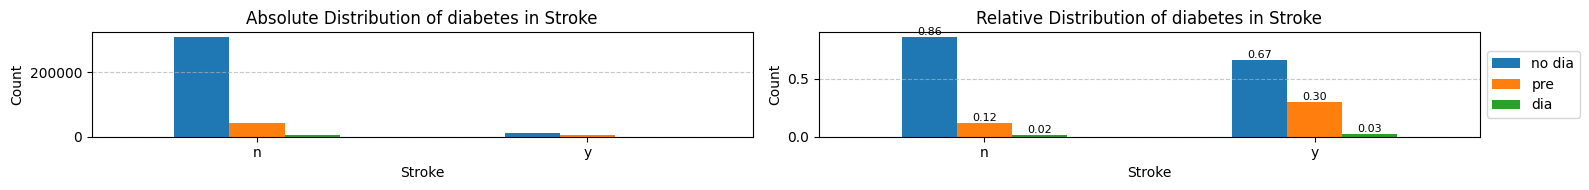

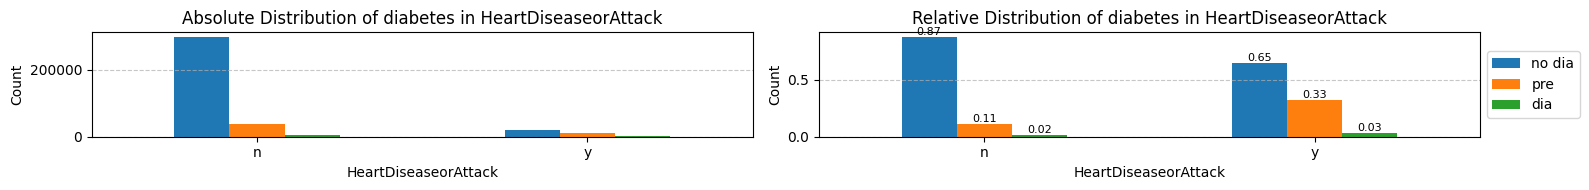

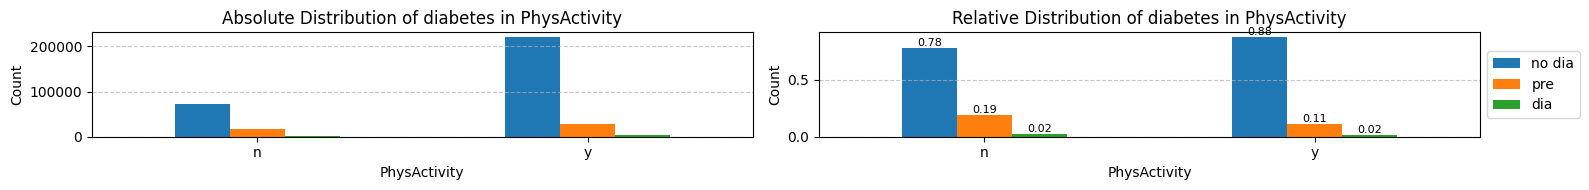

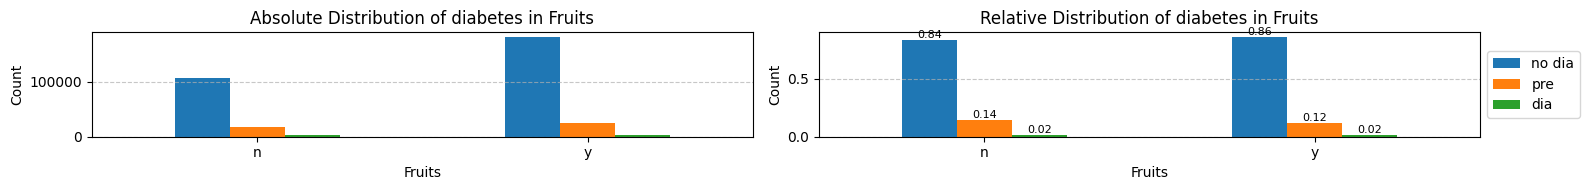

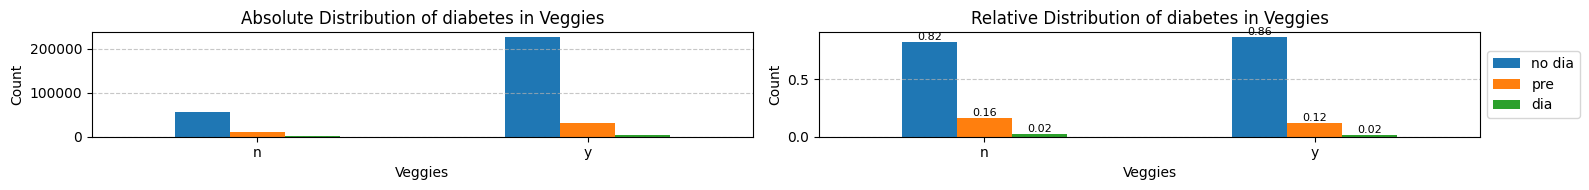

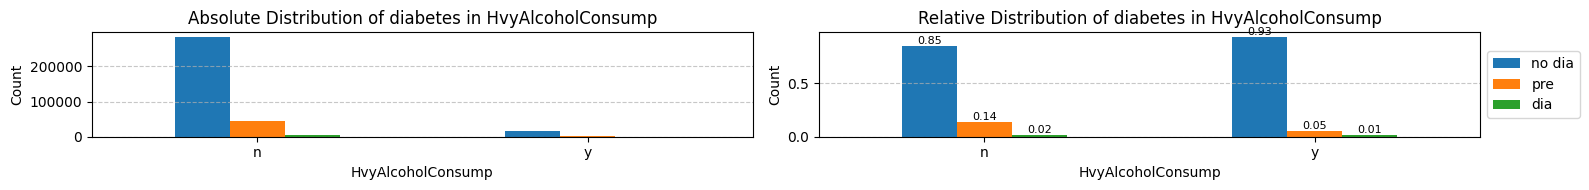

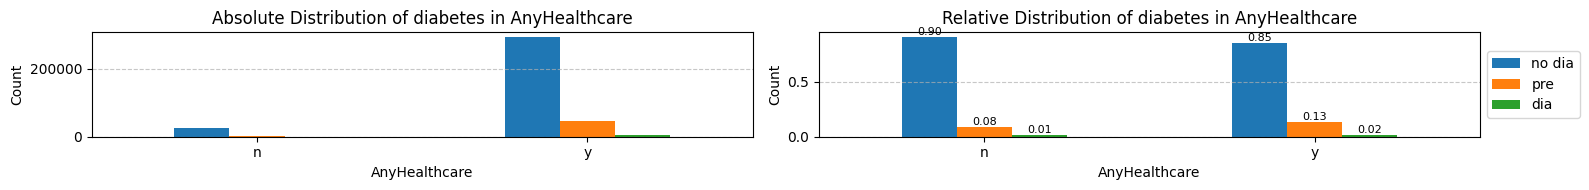

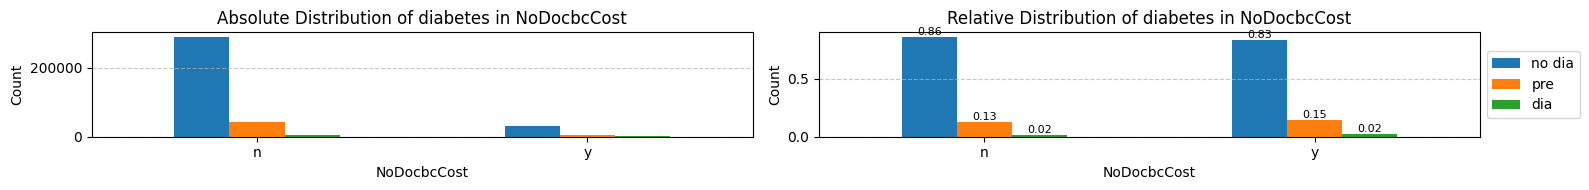

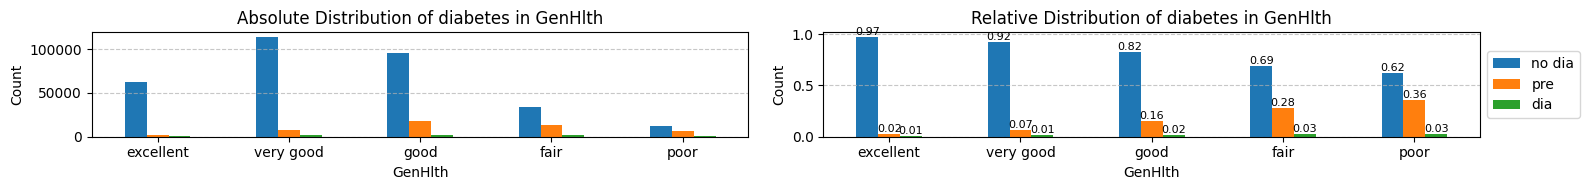

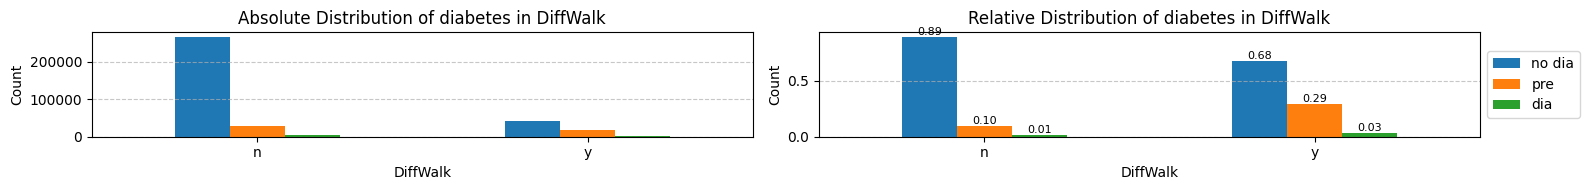

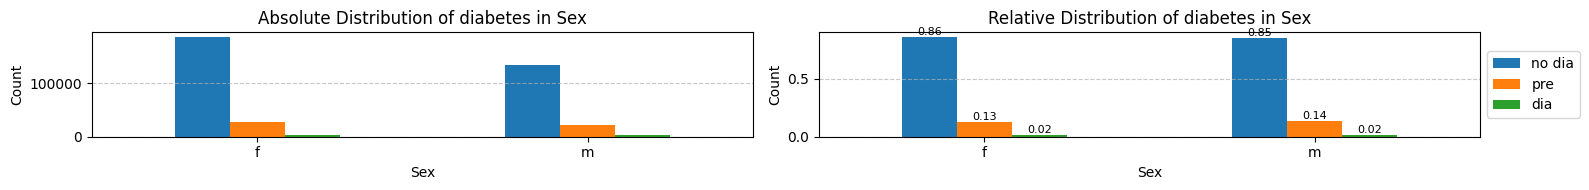

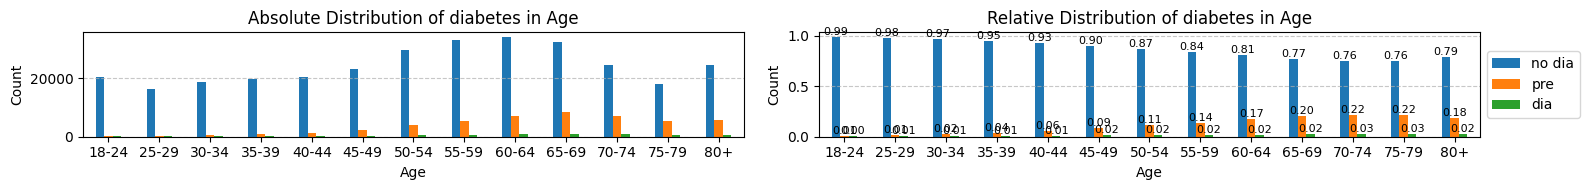

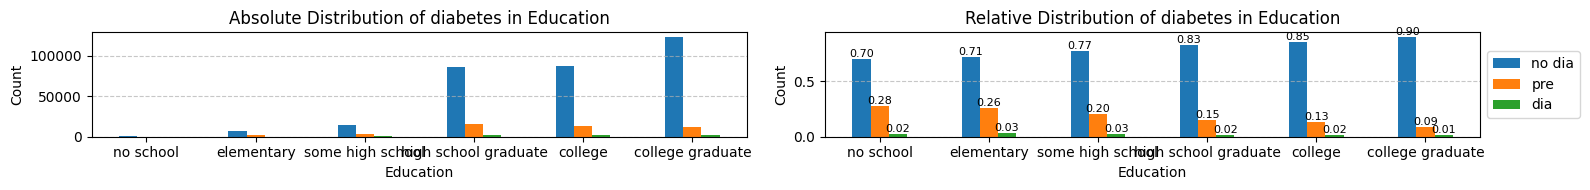

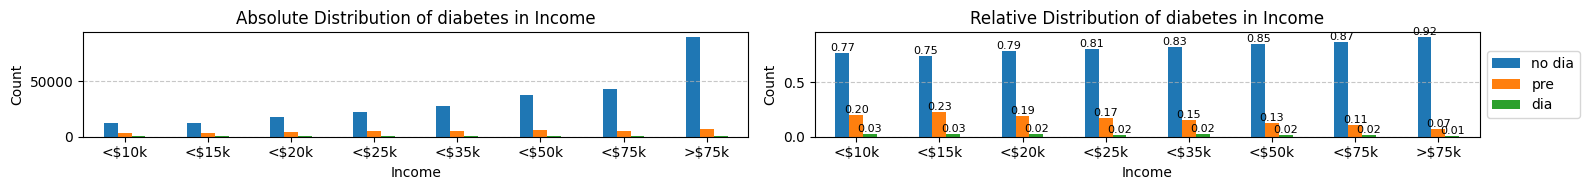

In [22]:
cat_cols = [
    c for c in df_raw.select_dtypes(include="category").columns if c != "Diabetes_012"
]

for c in cat_cols:
    catplot(df_raw, x=c, y="Diabetes_012")

## Pairplots

### Observation
* No relevant differences are visible between the pairplots
* `MenHlth` and `PhysHlth` have more entries on counts divisible by 5. Possibly just the human need for beauty.

### Numeric columns

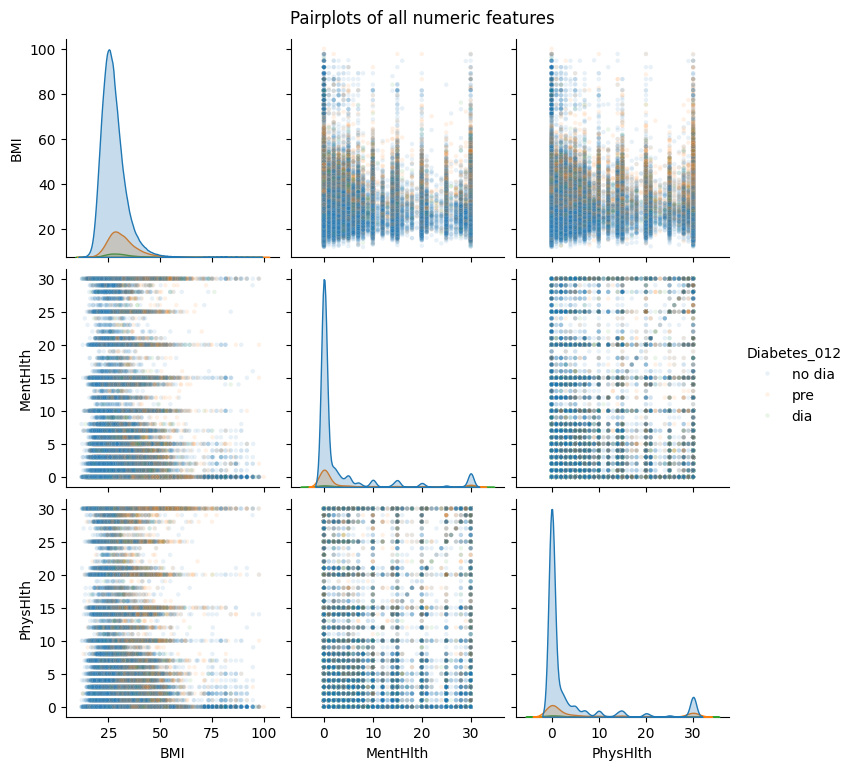

CPU times: total: 5min 42s
Wall time: 6min 46s


In [23]:
%%time
sns.pairplot(data=df_raw, plot_kws={"alpha": 0.1, "s": 10}, hue="Diabetes_012")
plt.suptitle("Pairplots of all numeric features", y=1.02)
plt.show();

### Classes
Splitting the classes in different plots may help identify patterns otherwise obscured by overlapping points.

#### Observation
No pattern were spotted.

In [ ]:
%%time
for dia_cls in df_raw["Diabetes_012"].cat.categories:
    sns.pairplot(
        data=df_raw[df_raw["Diabetes_012"] == dia_cls],
        plot_kws={"alpha": 0.1, "s": 10},
        hue="Diabetes_012",
    )
    plt.suptitle(f"Pairplots of all numeric features for diabetes class '{dia_cls}'", y=1.02)
    plt.show();

KeyboardInterrupt: 

### Sex

In [ ]:
%%time
feature = "Sex"
for cat in df_raw[feature].cat.categories:
    sns.pairplot(
        data=df_raw[df_raw[feature] == cat],
        plot_kws={"alpha": 0.1, "s": 10},
        hue="Diabetes_012",
    )
    plt.suptitle(f"Pairplots of all numeric features for category '{cat}' of feature '{feature}'", y=1.02)
    plt.show();

#### Pairplots Women

In [ ]:
%%time
sns.pairplot(
    data=df_raw[df_raw["Sex"] == "f"],
    plot_kws={"alpha": 0.1, "s": 10},
    hue="Diabetes_012",
)
plt.suptitle("Pairplots of numeric features for women", y=1.02)
plt.show();

#### Pairplots Men

In [ ]:
%%time
sns.pairplot(
    data=df_raw[df_raw["Sex"] == "m"],
    plot_kws={"alpha": 0.1, "s": 10},
    hue="Diabetes_012",
)
plt.suptitle("Pairplots of numeric features for men", y=1.02)
plt.show();

## Correlations

#### Observations
* There are notable correlations between 
  * `GenHlth`, `PhysHlth` and `DiffWalk`. These seem reasonable.
  * `Education` and `Income`. Also reasonable.
* There are lower, but still notable correlations between
  * `Diabetes_012`, `GenHlth`
  * `GenHlth`, `Diabetes_012`, `HighBP`, `Income`
  * `MenHlth`, `GenHlth`
  * `MenHlth`, `PhysHlth`
  * `Income`, `GenHlth`, `DiffWalk`, last one somewhat surprising

#### Conclusion
Relevant correlations are present. Appropriate feature selection must be conducted.

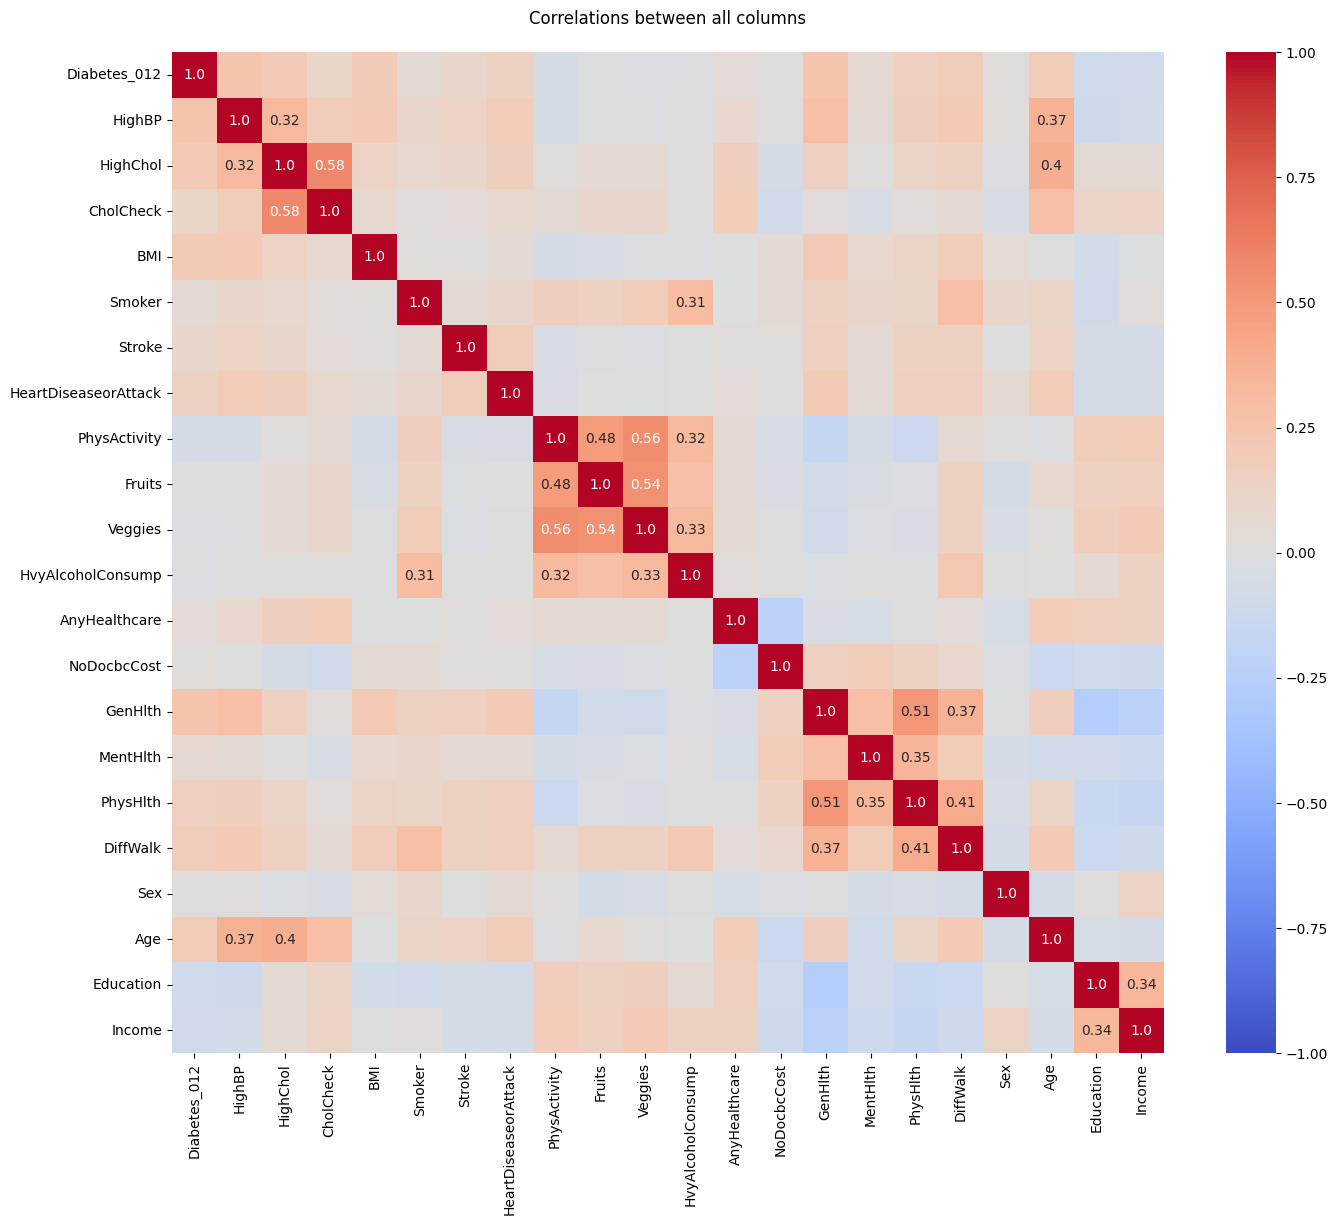

In [22]:
df_raw_copy = df_raw.copy()
for c in ord_cat_cols + nom_cat_cols:
    df_raw_copy[c] = df_raw_copy[c].cat.codes
    
corr = df_raw_copy.corr()
mask = np.abs(corr) < 0.3
annot = corr.round(2).astype(str)
annot[mask] = ""

plt.figure(figsize=(16, 13))
sns.heatmap(
    corr,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
)

plt.title("Correlations between all columns", y=1.02)
plt.show();

del df_raw_copy

## Outlier Detection

#### Observations
* Up to about 70 `BMI` has a clean distribution. From then on spikes appear with no visible reason. The distribution of diabetes looks similar to the whole distribution.
* `MentHlth` and `PhysHlth` have most of their values at 0. The distribution of diabetes looks similar to the whole distribution.

#### Conclusion
* Check the validity of the very high BMI-values.
* No outliers found.

In [ ]:
from statsmodels.robust import mad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def mark_outliers_mad(
    df,
    std=3,
    show_cum=False,
    show_interesting_rows=False,
    interesting_rows=None,
    return_masks=False,
):
    """
    Detect and visualize outliers in numeric columns using the MAD (Median Absolute Deviation) method.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing the data.
    std : float, optional
        Threshold in MAD units to define outliers (default is 3).
    show_cum : bool, optional
        If True, show cumulative distribution plots with outlier thresholds.
    show_interesting_rows : bool, optional
        If True, show histogram restricted to interesting_rows.
    interesting_rows : pd.Series[bool], optional
        Boolean mask indicating rows of interest.
    return_masks : bool, optional
        If True, return dictionary of boolean masks marking outliers per column.

    Returns
    -------
    dict (optional)
        Dictionary of boolean Series with outlier masks for each numeric column.
    """

    def get_mad_outliers_mask(df, column, std=3):
        x = df.loc[df[column].notna(), column]
        outliers = (abs(x - x.median()) / mad(x)) >= std

        mask = pd.Series(False, index=df.index)
        mask.loc[x.index] = outliers
        return mask

    outlier_masks = {}
    numeric_cols = df.select_dtypes(include="number").columns.tolist()

    column_config = {col: {} for col in numeric_cols}

    show_interesting_rows = show_interesting_rows and (interesting_rows is not None)

    ncols = 1 + sum([show_cum, show_interesting_rows])
    fig, ax = plt.subplots(
        nrows=len(numeric_cols), ncols=ncols, figsize=(14, len(numeric_cols) * 2 + 2)
    )

    if len(numeric_cols) == 1 and ncols == 1:
        ax = np.array([[ax]])
    elif len(numeric_cols) == 1:
        ax = np.atleast_2d(ax)
    elif ncols == 1:
        ax = np.atleast_2d(ax).T

    for idx, col in enumerate(numeric_cols):
        config = column_config[col]
        axe = ax[idx, 0]
        outlier_mask = get_mad_outliers_mask(df, col, std)

        if return_masks:
            outlier_masks[col] = outlier_mask

        df_temp = pd.concat(
            [df, pd.DataFrame({f"mad_{std}_outlier": outlier_mask})], axis=1
        )

        sns.histplot(data=df_temp, x=col, ax=axe, hue=f"mad_{std}_outlier", bins=100)
        axe.set_yscale("log")
        axe.set_title(f"Histogram: {col}")

        if show_interesting_rows:
            prev_axe = axe
            axe = ax[idx, 1]
            axe.set_xlim(prev_axe.get_xlim())
            axe.set_ylim(prev_axe.get_ylim())

            df_temp = pd.concat(
                [df[[col]].copy(), pd.DataFrame({f"mad_{std}_outlier": outlier_mask})],
                axis=1,
            )
            df_temp.loc[~interesting_rows, col] = np.nan

            sns.histplot(data=df_temp, x=col, ax=axe, hue=f"mad_{std}_outlier", bins=100)
            axe.set_yscale("log")
            axe.set_title(f"Subset histogram: {col}")

        if show_cum:
            lower_threshold = df[~outlier_mask][col].min()
            upper_threshold = df[~outlier_mask][col].max()

            axe = ax[idx, 1 + show_interesting_rows]
            sns.ecdfplot(df[col].dropna(), ax=axe)

            axe.axvline(
                x=lower_threshold, color="blue", linestyle="--", label="lower threshold"
            )
            axe.axvline(
                x=upper_threshold, color="red", linestyle="--", label="upper threshold"
            )

            col_data = df[col].dropna()
            outlier_low = (col_data < lower_threshold).mean()
            outlier_high = (col_data > upper_threshold).mean()

            axe.set_title(
                f"CDF: {col}\n"
                f"Outliers < {lower_threshold:.2f}: {outlier_low:.3f} | "
                f"> {upper_threshold:.2f}: {outlier_high:.3f}"
            )
            axe.legend()

    plt.suptitle(f"MAD Outlier Detection (±{std} MAD)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    if return_masks:
        return outlier_masks


In [ ]:
mark_outliers_mad(
    df_raw,
    show_interesting_rows=True,
    interesting_rows=df_raw["Diabetes_012"] != "no dia",
    show_cum=True,
)